<a href="https://colab.research.google.com/github/MiggieCS911/AllAbouteCovidTH/blob/main/COVID_modelIndia_TH_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy

# Import data

Data for training and testing comes from ['Our World in Data.'](https://ourworldindata.org/coronavirus/country/india)
There are numerous valuable data about covid-19 infection from around the world.
However, There was some but no update data from Thailand about how many testing covid-19 was done?
I look at Thailand's [Data.go.th](https://data.go.th/dataset/covid-19-testing-data). There is data about how many testing cases were done, but it was not updated to real-time.<br>
<br>
Hence, I used new cases data from 'Our World in Data', which was last updated was 20 July 2021. And for some visualization, I used data from data.go.th for the number of testing covid-19 in Thailand.<br> 

In [ ]:
alldf = pd.read_csv('/content/drive/MyDrive/covid_model/data/owid-covid-data.csv')

In [ ]:
alldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103907 entries, 0 to 103906
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               103907 non-null  object 
 1   continent                              99067 non-null   object 
 2   location                               103907 non-null  object 
 3   date                                   103907 non-null  object 
 4   total_cases                            99800 non-null   float64
 5   new_cases                              99797 non-null   float64
 6   new_cases_smoothed                     98787 non-null   float64
 7   total_deaths                           89535 non-null   float64
 8   new_deaths                             89691 non-null   float64
 9   new_deaths_smoothed                    98787 non-null   float64
 10  total_cases_per_million                99270 non-null   

# Aim

My propose is tending of covid-19 infection in Thailand will be the same as in India. So, I will show: <br>
1. Visualization testing data and new cases data between 2 countries
2. I will create a model that used data from India. Then, bring that model to predict new cases of covid-19 infection from Thailand.

# Visualization

In [ ]:
#Selected India and useful features
indiadf = alldf.loc[alldf['location']=='India',['date','total_cases','new_cases','total_cases_per_million','new_cases_per_million',
                                      'new_tests','total_tests','new_tests_per_thousand','total_tests_per_thousand']].copy()

In [ ]:
indiadf.head()

,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,new_tests,total_tests,new_tests_per_thousand,total_tests_per_thousand
42960,2020-01-30,1.0,1.0,0.001,0.001,NaN,NaN,NaN,NaN
42961,2020-01-31,1.0,0.0,0.001,0.000,NaN,NaN,NaN,NaN
42962,2020-02-01,1.0,0.0,0.001,0.000,NaN,NaN,NaN,NaN
42963,2020-02-02,2.0,1.0,0.001,0.001,NaN,NaN,NaN,NaN
42964,2020-02-03,3.0,1.0,0.002,0.001,NaN,NaN,NaN,NaN


In [ ]:
indiadf.shape

(538, 9)

In [ ]:
indiadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 42960 to 43497
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      538 non-null    object 
 1   total_cases               538 non-null    float64
 2   new_cases                 538 non-null    float64
 3   total_cases_per_million   538 non-null    float64
 4   new_cases_per_million     538 non-null    float64
 5   new_tests                 468 non-null    float64
 6   total_tests               478 non-null    float64
 7   new_tests_per_thousand    468 non-null    float64
 8   total_tests_per_thousand  478 non-null    float64
dtypes: float64(8), object(1)
memory usage: 42.0+ KB


In [ ]:
# Chane date to datetime object
indiadf['date'] = pd.to_datetime(indiadf.date)

In [ ]:
# new tests per thousand to new test per million
indiadf['new_tests_per_million'] = indiadf['new_tests_per_thousand']*1000

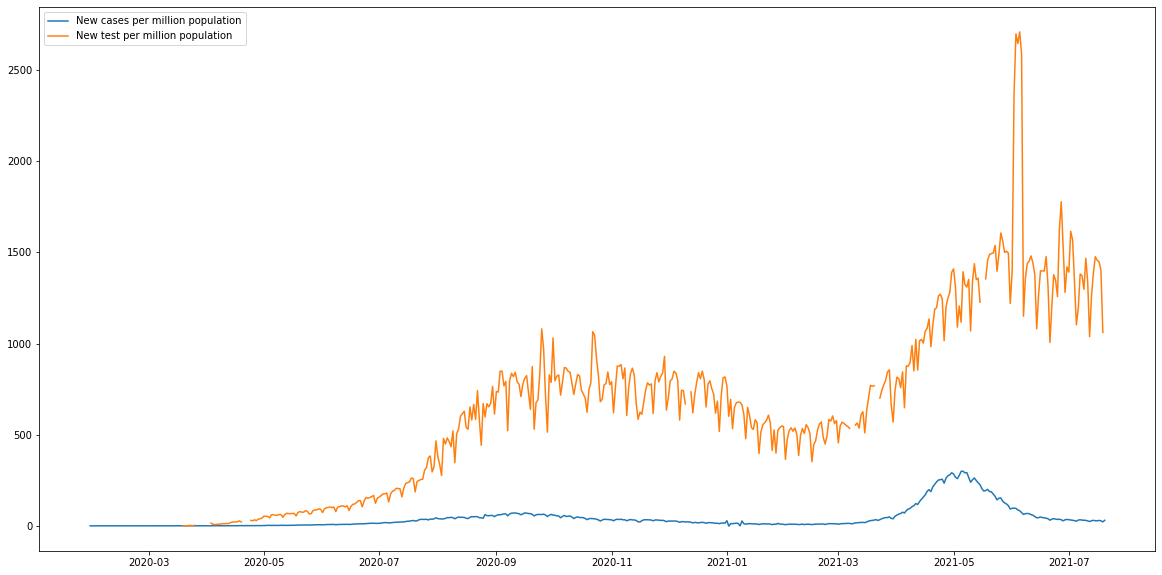

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(indiadf['date'], indiadf['new_cases_per_million'], label = 'New cases per million population')
plt.plot(indiadf['date'], indiadf['new_tests_per_million'], label = 'New test per million population')

plt.legend()
plt.show()

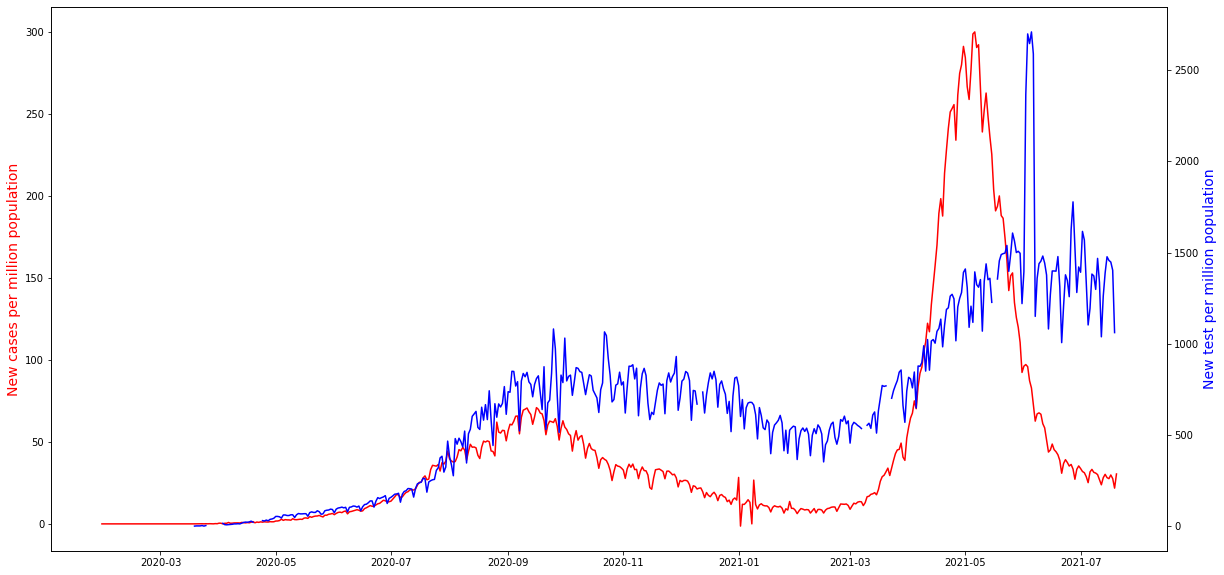

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (20,10))

ax.plot(indiadf['date'], indiadf['new_cases_per_million'], label = 'New cases per million population', c = 'r')
ax.set_ylabel('New cases per million population', c = 'r', fontsize = 14)

#set new axis y same x
ax2 = ax.twinx()
ax2.plot(indiadf['date'], indiadf['new_tests_per_million'], label = 'New test per million population', c = 'b')
ax2.set_ylabel('New test per million population', c = 'b', fontsize = 14)

plt.show()

*Figure shows data from India between January 2020 and July20th, 2021: the left y-axis (red) shows the number of new cases and the right y-axis (blue) shows the number of covid test.*

Thai dataframe

In [ ]:
#Thai df
thaidf = alldf.loc[alldf['location'] == 'Thailand', ['date','total_cases','new_cases','total_cases_per_million','new_cases_per_million',
                                      'new_tests','total_tests','new_tests_per_thousand','total_tests_per_thousand']].copy()

In [ ]:
thaidf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 93020 to 93583
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      564 non-null    object 
 1   total_cases               546 non-null    float64
 2   new_cases                 545 non-null    float64
 3   total_cases_per_million   546 non-null    float64
 4   new_cases_per_million     545 non-null    float64
 5   new_tests                 553 non-null    float64
 6   total_tests               553 non-null    float64
 7   new_tests_per_thousand    553 non-null    float64
 8   total_tests_per_thousand  553 non-null    float64
dtypes: float64(8), object(1)
memory usage: 44.1+ KB


In [ ]:
thaidf['date'] = pd.to_datetime(thaidf.date)

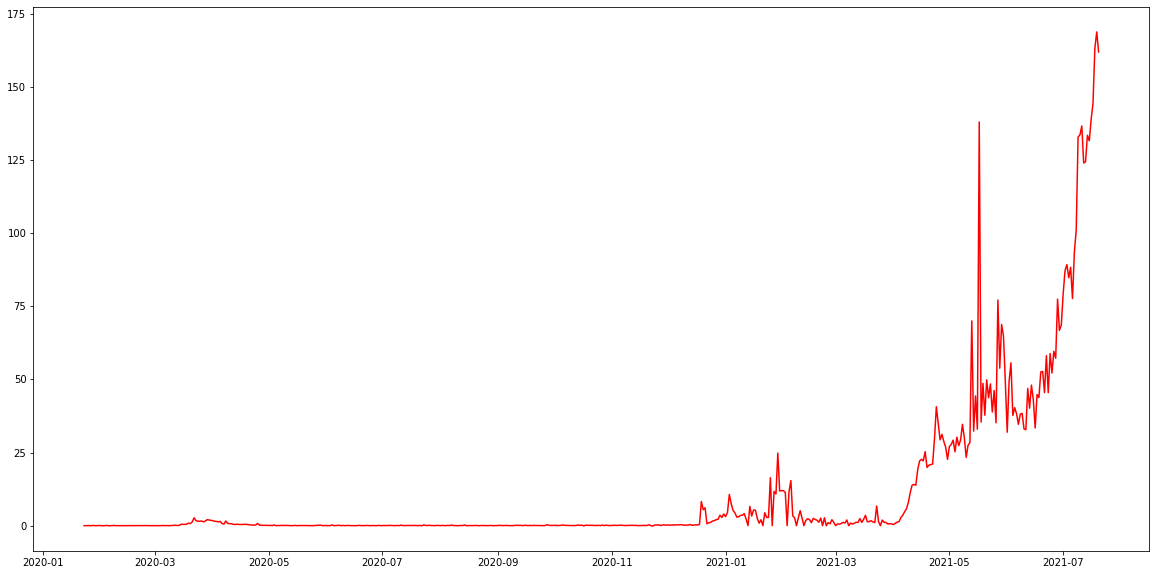

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(thaidf['date'], thaidf['new_cases_per_million'], label = 'New cases per million population', c = 'r')

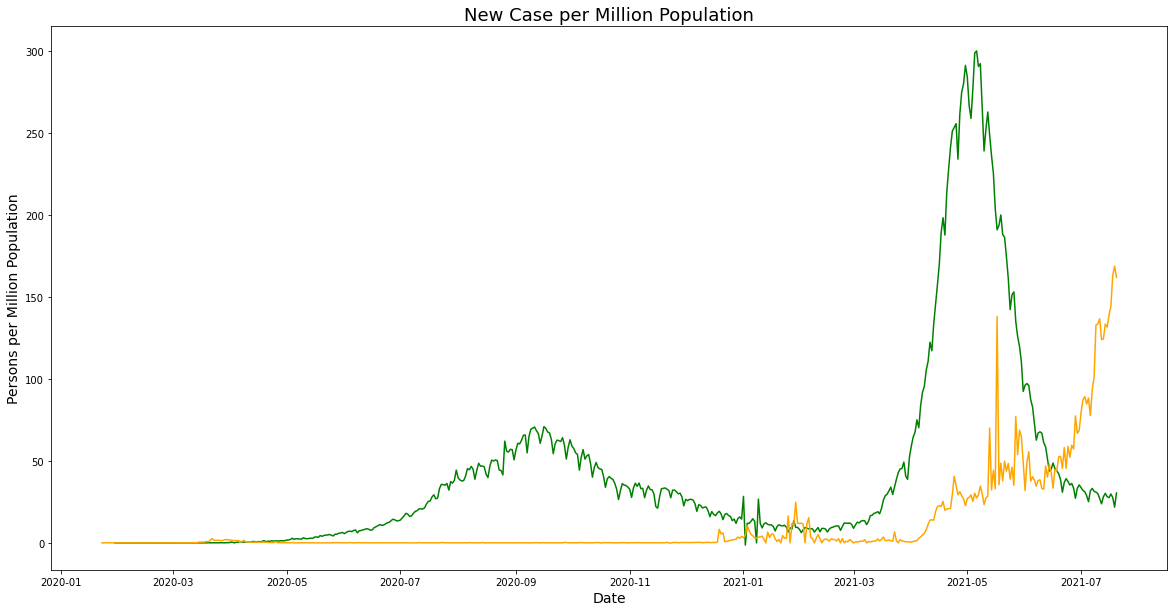

In [ ]:
#visualization how similar between Thai and india

plt.figure(figsize=(20,10))
plt.plot(indiadf['date'], indiadf['new_cases_per_million'], label = 'India', c = 'green')
plt.plot(thaidf['date'], thaidf['new_cases_per_million'], label = 'Thai', c = 'orange')

plt.title('New Case per Million Population', fontsize = 18)
plt.ylabel('Persons per Million Population', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.show()

*Figure shows India (green) and Thai (yellow) new cases data.*

In [ ]:
#import test covid thailand
thaitest = pd.read_csv('/content/drive/MyDrive/covid_model/data/thailand_covid-19_testing_data-update-20210717.csv')

In [ ]:
thaitest = thaitest[['Date','positive','Total Testing']]

In [ ]:
thaitest.drop(0, axis=0, inplace=True)

In [ ]:
thaitest = thaitest.reset_index().drop('index', axis=1)

In [ ]:
thaitest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           564 non-null    object
 1   positive       564 non-null    int64 
 2   Total Testing  564 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.3+ KB


In [ ]:
thaitest.Date = pd.to_datetime(thaitest.Date, dayfirst=True)

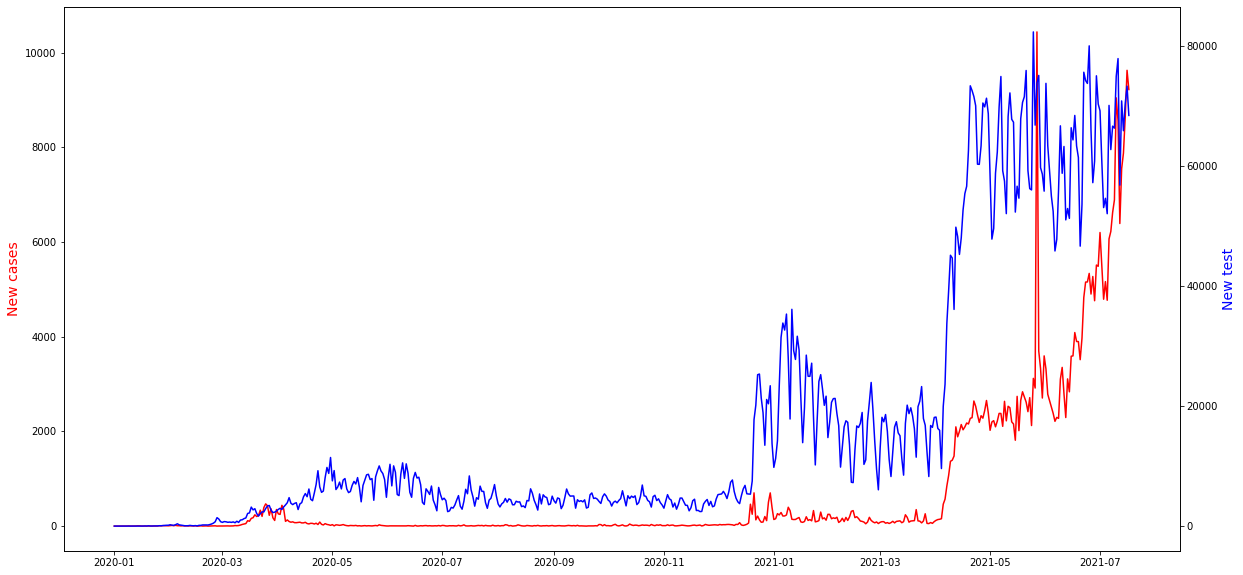

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (20,10))

ax.plot(thaitest['Date'], thaitest['positive'], label = 'New cases', c = 'r')
ax.set_ylabel('New cases', c = 'r', fontsize = 14)

#set new axis y same x
ax2 = ax.twinx()
ax2.plot(thaitest['Date'], thaitest['Total Testing'], label = 'New test', c = 'b')
ax2.set_ylabel('New test', c = 'b', fontsize = 14)

plt.show()

*Figure shows data from Thailand between January 2020 and July20th, 2021: the left y-axis (red) shows the number of new cases and the right y-axis (blue) shows the number of covid test.*

In [ ]:
#change thattest to per million population
#thai pop = 69.63 million

thaitest['positive_per_million'] = thaitest['positive']/69.93
thaitest['test_per_million'] = thaitest['Total Testing']/69.93

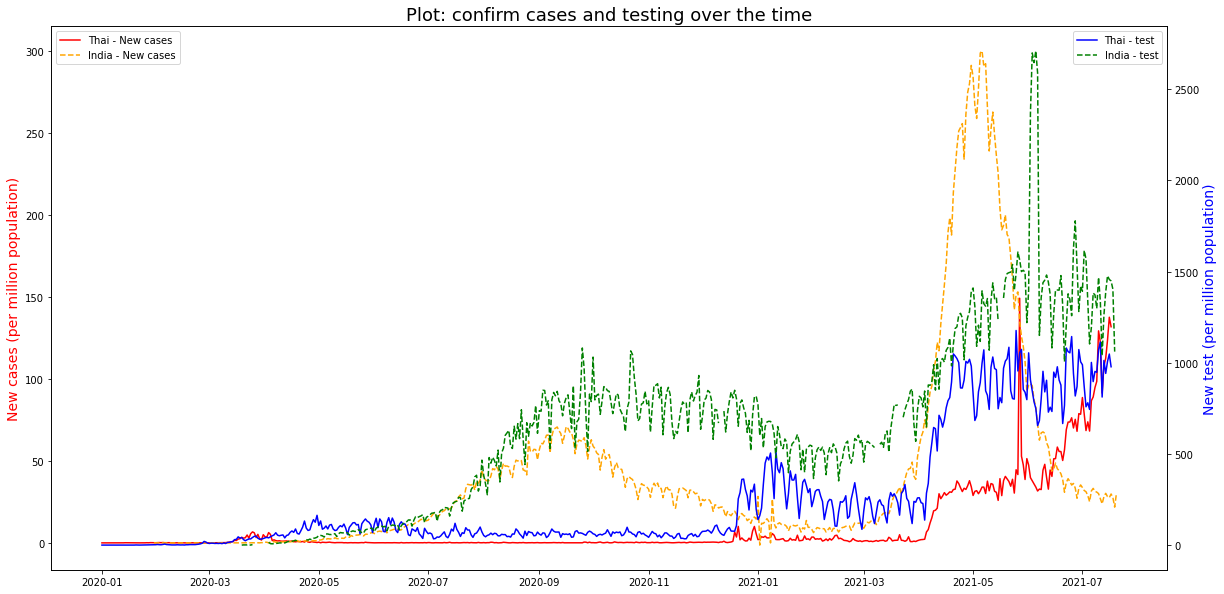

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (20,10))

ax.plot(thaitest['Date'], thaitest['positive_per_million'], label = 'Thai - New cases', c = 'r')
ax.plot(indiadf['date'], indiadf['new_cases_per_million'], label = 'India - New cases', c = 'orange',ls = '--')
ax.set_ylabel('New cases (per million population)', c = 'r', fontsize = 14)
plt.legend(loc = 'upper left')

#set new axis y same x
ax2 = ax.twinx()
ax2.plot(thaitest['Date'], thaitest['test_per_million'], label = 'Thai - test', c = 'b')
ax2.plot(indiadf['date'], indiadf['new_tests_per_million'], label = 'India - test', c = 'green', ls = '--')
ax2.set_ylabel('New test (per million population)', c = 'b', fontsize = 14)

plt.title('Plot: confirm cases and testing over the time', fontsize = 18)
plt.legend()

# plt.savefig('/content/drive/MyDrive/covid_model/result/IND_TH_time.png', dpi = 800)
plt.show()

Figure show new cases and test of both countries.

# Construct the prediction model
Univariate model
1. LSTM: The number of new cases from the previous 14 days predicst the covid-19 new cases on the next day.

## 1. Univariate LSTM model

In [ ]:
indiadf['new_cases_per_million'].isnull().sum()

0

In [ ]:
indiadf.reset_index(drop=True, inplace=True)

In [ ]:
indiadf.shape

(538, 10)

### Preparing data

In [ ]:
# create data

datanewcase = []
results = []

for i in range(14, len(indiadf)):
  data14day = indiadf.loc[i-14:i-1, 'new_cases_per_million'].values #loc will include last index
  result = indiadf.loc[i, 'new_cases_per_million']

  datanewcase.append(data14day)
  results.append(result)

print(len(datanewcase))
print(len(results))

524
524


In [ ]:
datanewcase[400], results[400]

(array([13.249, 13.59 , 13.477, 11.151, 12.986, 16.561, 16.873, 18.03 ,
        18.348, 19.051, 17.748, 20.944, 25.993, 28.787]), 29.676)

In [ ]:
x = copy.deepcopy(datanewcase)
y = results.copy()

In [ ]:
X_train = np.array(x)
y_train = np.array(y)

In [ ]:
X_train.shape, y_train.shape

((524, 14), (524,))

In [ ]:
X_train[1]

array([0.   , 0.   , 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   ])

In [ ]:
#reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train[1]

array([[0.   ],
       [0.   ],
       [0.001],
       [0.001],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ],
       [0.   ]])

import tensorflow and keras library

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from keras.models import Model, Sequential
# from keras.utils import to_categorical
from keras.optimizers import Adam 
from keras.losses import BinaryCrossentropy, categorical_crossentropy

In [ ]:
model14day_nextday_uni = Sequential()
model14day_nextday_uni.add(LSTM(50, input_shape = (14,1) )) # 14 timesteps, 1 feature, activation = tanh
# model14day_nextday_uni.add(Dropout(0.2))
model14day_nextday_uni.add(Dense(100))
model14day_nextday_uni.add(Dropout(0.2))
model14day_nextday_uni.add(Dense(1))
model14day_nextday_uni.compile(optimizer = 'adam', loss='mse')

model14day_nextday_uni.fit(X_train,y_train, epochs = 300, verbose = 1)

Epoch 1/300
17/17 [==============================] - 21s 4ms/step - loss: 5392.9172
Epoch 2/300
17/17 [==============================] - 0s 4ms/step - loss: 5136.5104
Epoch 3/300
17/17 [==============================] - 0s 4ms/step - loss: 4427.0322
Epoch 4/300
17/17 [==============================] - 0s 4ms/step - loss: 4154.4363
Epoch 5/300
17/17 [==============================] - 0s 4ms/step - loss: 2433.9257
Epoch 6/300
17/17 [==============================] - 0s 4ms/step - loss: 2806.7137
Epoch 7/300
17/17 [==============================] - 0s 4ms/step - loss: 1781.9546
Epoch 8/300
17/17 [==============================] - 0s 4ms/step - loss: 1114.8264
Epoch 9/300
17/17 [==============================] - 0s 4ms/step - loss: 989.4058
Epoch 10/300
17/17 [==============================] - 0s 4ms/step - loss: 397.9128
Epoch 11/300
17/17 [==============================] - 0s 4ms/step - loss: 332.2678
Epoch 12/300
17/17 [==============================] - 0s 4ms/step - loss: 216.4919
Epoc

In [ ]:
model14day_nextday_uni.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 100)               5100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 15,601
Trainable params: 15,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = model14day_nextday_uni.history.history['loss']

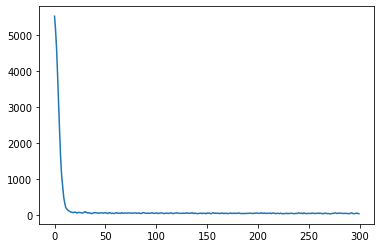

In [ ]:
plt.plot(loss)

### Preparing Test set -> Thai data

In [ ]:
thaidf['new_cases_per_million'].values[:40]

array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan, 0.   , 0.014, 0.014, 0.029, 0.   , 0.086, 0.   , 0.   ,
       0.072, 0.   , 0.   , 0.   , 0.086, 0.   , 0.   , 0.   , 0.1  ,
       0.   , 0.   , 0.014, 0.   ])

In [ ]:
thaidf.reset_index(drop=True, inplace=True)

In [ ]:
thai30oct2020 = thaidf.loc[300:,['date', 'new_cases_per_million']].copy()

In [ ]:
thai30oct2020.reset_index(drop=True, inplace=True)

In [ ]:
# create test TH data

datatest = []
results_test = []

for i in range(14, len(thai30oct2020)):
  data14day_test = thai30oct2020.loc[i-14:i-1, 'new_cases_per_million'].values #loc will include last index
  result_test = thai30oct2020.loc[i, 'new_cases_per_million']

  datatest.append(data14day_test)
  results_test.append(result_test)

print(len(datatest))
print(len(results_test))

250
250


In [ ]:
datatest

[array([0.072, 0.057, 0.043, 0.143, 0.1  , 0.086, 0.115, 0.172, 0.1  ,
        0.043, 0.057, 0.043, 0.072, 0.129]),
 array([0.057, 0.043, 0.143, 0.1  , 0.086, 0.115, 0.172, 0.1  , 0.043,
        0.057, 0.043, 0.072, 0.129, 0.072]),
 array([0.043, 0.143, 0.1  , 0.086, 0.115, 0.172, 0.1  , 0.043, 0.057,
        0.043, 0.072, 0.129, 0.072, 0.115]),
 array([0.143, 0.1  , 0.086, 0.115, 0.172, 0.1  , 0.043, 0.057, 0.043,
        0.072, 0.129, 0.072, 0.115, 0.014]),
 array([0.1  , 0.086, 0.115, 0.172, 0.1  , 0.043, 0.057, 0.043, 0.072,
        0.129, 0.072, 0.115, 0.014, 0.043]),
 array([0.086, 0.115, 0.172, 0.1  , 0.043, 0.057, 0.043, 0.072, 0.129,
        0.072, 0.115, 0.014, 0.043, 0.029]),
 array([0.115, 0.172, 0.1  , 0.043, 0.057, 0.043, 0.072, 0.129, 0.072,
        0.115, 0.014, 0.043, 0.029, 0.115]),
 array([0.172, 0.1  , 0.043, 0.057, 0.043, 0.072, 0.129, 0.072, 0.115,
        0.014, 0.043, 0.029, 0.115, 0.057]),
 array([0.1  , 0.043, 0.057, 0.043, 0.072, 0.129, 0.072, 0.115, 0.014,
 

In [ ]:
datatest[1], results_test[1]

(array([0.057, 0.043, 0.143, 0.1  , 0.086, 0.115, 0.172, 0.1  , 0.043,
        0.057, 0.043, 0.072, 0.129, 0.072]), 0.115)

In [ ]:
x_test = copy.deepcopy(datatest)
y_test = results_test.copy()

In [ ]:
X_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
X_test.shape, y_test.shape

((250, 14), (250,))

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(250, 14, 1)

### predict in TH data

In [ ]:
predict = model14day_nextday_uni.predict(X_test)
predict

array([[ 3.00769269e-01],
       [ 1.76464751e-01],
       [ 1.98587283e-01],
       [-6.64261878e-02],
       [-6.24048710e-02],
       [-3.49418521e-02],
       [ 2.21674278e-01],
       [ 1.29433244e-01],
       [ 1.68275058e-01],
       [ 7.51997352e-01],
       [-1.95999861e-01],
       [-7.59580612e-01],
       [ 2.39137158e-01],
       [ 6.00798249e-01],
       [ 6.18204117e-01],
       [-6.58914745e-02],
       [-7.41721988e-02],
       [ 3.34726095e-01],
       [ 2.61199176e-02],
       [ 1.85612872e-01],
       [ 8.54412317e-02],
       [ 9.76155698e-02],
       [ 2.86414355e-01],
       [ 1.92203015e-01],
       [ 3.71715695e-01],
       [ 3.38458270e-01],
       [ 4.43441391e-01],
       [ 2.29714826e-01],
       [-3.57235968e-02],
       [ 3.38587165e-03],
       [ 2.60579377e-01],
       [ 6.90273643e-01],
       [ 2.45023936e-01],
       [ 2.25547105e-01],
       [ 4.14370030e-01],
       [ 3.54584157e-01],
       [ 7.80648947e-01],
       [ 2.42174301e+01],
       [ 6.3

In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, predict))

197.69286024538002


In [ ]:
print('root mean square error: ', np.sqrt(mean_squared_error(y_test, predict)))

root mean square error:  14.060329307856911


In [ ]:
y_test[-1]

161.963

In [ ]:
predict[-1]

array([180.60364], dtype=float32)

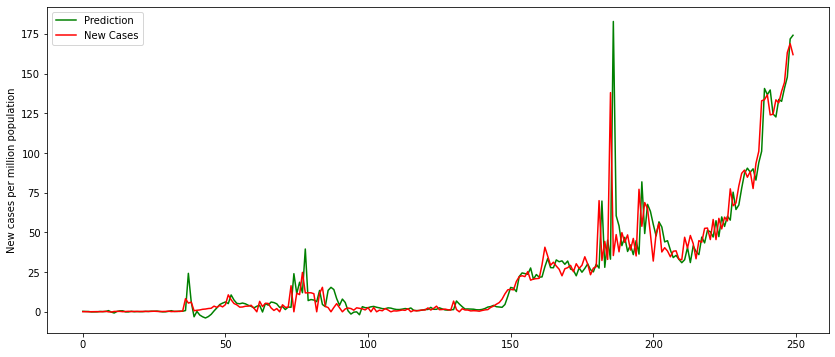

In [ ]:
plt.figure(figsize=(14,6))

plt.plot(predict, c = 'green', label = 'Prediction')
plt.plot(y_test, c = 'red', label = 'New Cases')

plt.ylabel('New cases per million population')
plt.legend(loc = 'upper left')
# plt.savefig('/content/drive/MyDrive/covid_model/result/predictionModelLSTM14_1.png', dpi=800)
plt.show()

*Figure shows prediction and true value*

In [ ]:
# model14day_nextday_uni.save('/content/drive/MyDrive/covid_model/result/CovidPredictionNextDayFrom14day.h5')

In [ ]:
161*69.93

11258.730000000001

In [ ]:
predict[-1]*69.93

array([11597.578], dtype=float32)

In [ ]:
thai